<a href="https://colab.research.google.com/github/Junigamer/Pruebas/blob/main/CDP_1_SRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Community Detection Problem

Para comenzar vamos a comprobar que seamos capaces de importar los módulos de Python que necesitaremos.
La finalidad de este cuaderno será hacer una <i>puesta a punto</i>: instalar los módulos, y poder cargar los datos NIPS.
Finalmente, a partir de los datos de NIPS y utilizando los módulos NetworkX y Community, mostraremos distintos gráficos sobre los autores y su colaboración.

Importa las siguientes bibliotecas:

In [ ]:
# SQL
import sqlite3

# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Construcción del grafo NIPS

Los datos publicados en la conferencia NIPS durante las últimas décadas se encuentran en el archivo <b>database.sqlite</b>.
Usando el siguiente código, deberíamos poder extraer los datos en una tabla de tres columnas.
En las columnas debe aparecer el ID del artículo, el ID del autor y el nombre del autor.

In [ ]:
# Get data
connect = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/Heurísticos de Búsqueda/Proyecto/Data/database.sqlite')
query = """
SELECT pa.paper_id, pa.author_id, a.name
FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
JOIN authors as a ON pa.author_id = a.id
WHERE p.Year BETWEEN '2014' AND '2015'
"""
df = pd.read_sql(query, connect)

# Have a look at data
df.head(10)

,paper_id,author_id,name
0,5239,5654,Krikamol Muandet
1,5239,7140,Bharath Sriperumbudur
2,5239,1472,Bernhard Sch?lkopf
3,5591,5209,Yichuan Zhang
4,5591,7542,Charles Sutton
5,5597,7649,Mu Li
6,5597,7650,David G. Andersen
7,5597,6548,Alexander J. Smola
8,5597,2847,Kai Yu
9,5299,7226,Halid Z. Yerebakan


¡Eureka! Ya tenemos los datos.
Ahora construiremos el grafo de colaboración, para esto usaremos el módulo NetworkX.
En ese grafo tendremos un nodo para cada autor, y si ha habido colaboración entre dos autores (han escrito un artículo juntos), entonces habrá también un arco entre los nodos correspondientes.
Para reflejar la fuerza de la colaboración (no es lo mismo hacer una colaboración, que 100) los arcos tendrán un peso, que indicará el número de colaboraciones.
Para saber que has creado el gráfico correctamente, con los datos entre 2014 y 2015, deberías obtener un gráfico con 1843 nodos y 3215 arcos.

In [ ]:
# Initialize graph
G = nx.Graph()

# Transform
for p, a in df.groupby('paper_id')['name']:
    for u, v in itertools.combinations(a, 2):
        if G.has_edge(u, v):
            G[u][v]['weight'] +=1
        else:
            G.add_edge(u, v, weight=1)

# Print graph size
print("Número de autores en el grafo: {}".format(G.number_of_nodes()))
print("Número de aristas en el grafo: {}".format(G.number_of_edges()))

Número de autores en el grafo: 1843
Número de aristas en el grafo: 3215


Finalmente, mostraremos el grafo que hemos construido.
Para ello, utilizaremos el módulo MatPlotLib.

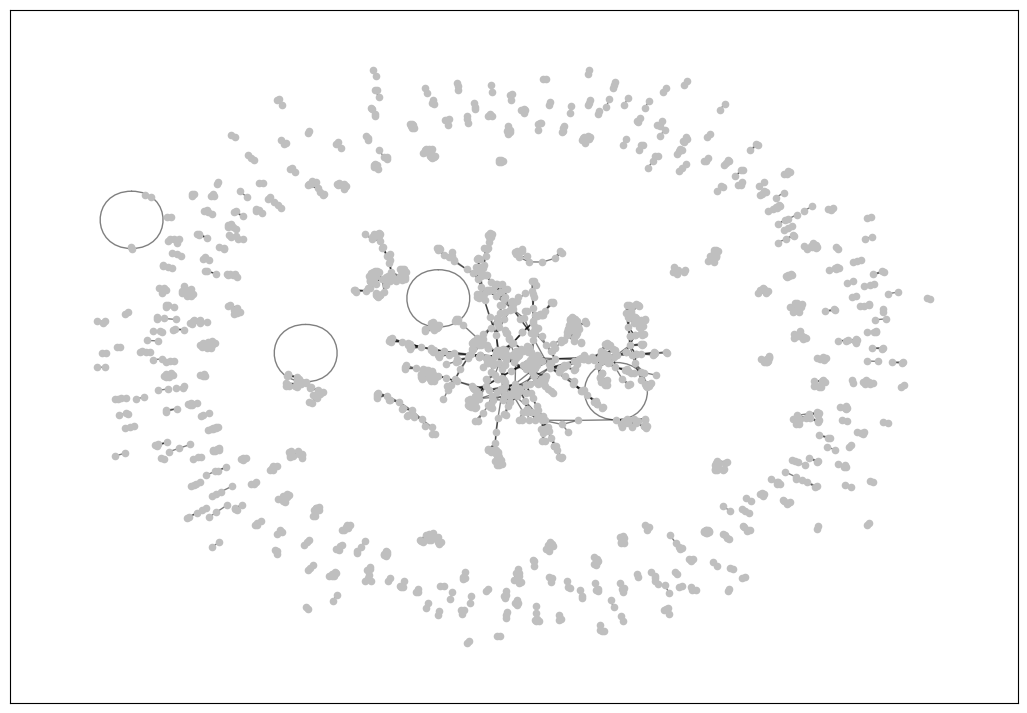

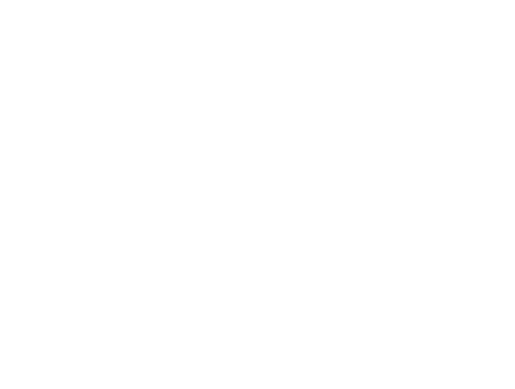

In [ ]:
%matplotlib inline

#Draw graph
plt.figure(figsize=(13, 9))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 20, node_color='0.75')
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
plt.show()

plt.axis('off')
plt.show()

A continuación, crea las siguientes funciones utilizando como base el código anterior:

In [ ]:
# SQL
import sqlite3

# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

def crear_grafo():

    # Leer datos
    # TODO 8 lineas
    connect = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/Heurísticos de Búsqueda/Proyecto/Data/database.sqlite')
    query = """
    SELECT pa.paper_id, pa.author_id, a.name
    FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
    JOIN authors as a ON pa.author_id = a.id
    WHERE p.Year BETWEEN '2014' AND '2015'
    """
    df = pd.read_sql(query, connect)


    # Crear grafo
    # TODO 7-10 lineas
    G = nx.Graph()

    for p, a in df.groupby('paper_id')['name']:
        for u, v in itertools.combinations(a, 2):
            if G.has_edge(u, v):
                G[u][v]['weight'] +=1
            else:
                G.add_edge(u, v, weight=1)

    return G

def visualizar_grafo(G):
    # TODO 6 lineas
    %matplotlib inline
    plt.figure(figsize=(13, 9))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 20, node_color='0.75')
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
    plt.axis('off')
    plt.show()

In [ ]:
G = crear_grafo()
visualizar_grafo(G)

# Sprint 1: Formalización del problema

## Espacio de codificación de soluciones


## Codificación de soluciones


In [ ]:
### Propón algunas soluciones al problema como ejemplo

import random

n = G.number_of_nodes()

def initialize_vector(n, k):
    vector = []
    for i in range(n):
        vector.append(random.randint(0, k))
    return vector

def initialize_vector_random(n):
    k = random.randint(1,n)
    vector = []
    for i in range(n):
        vector.append(random.randint(0, k-1))
    return vector

partition1 = initialize_vector(n, 400)
partition2 = initialize_vector(n, 50)





### Función objetivo


In [ ]:
import numpy as np
import community.community_louvain as community_louvain

#A = np.array([4,2,1,3])
#B = np.array([4,2,1,3])

#result = np.outer(A, B)
#print(result)
#np.multiply(result,result)

#partition1 = community_louvain.best_partition(G, weight='weight')
#partition2 = community_louvain.best_partition(G, weight='weight', randomize=True)
#print(p1.values())
#p = list(partition1.values())
#adj_matrix = nx.to_numpy_array(G)
#print(sum(adj_matrix[10]))
#k = np.array([G.degree(node,weight = 'weight') for node in G.nodes])
#print(k[10])
#p[0]


In [ ]:
from networkx.algorithms.bipartite.projection import weighted_projected_graph
# pip install ipynb
from itertools import product
#from ???? import crear_grafo
import community
import networkx as nx
import numpy as np

### Función objetivo
def modularidad(G, particion, weight='weight'):

    ### TODO 15-20 lineas
    n = G.number_of_nodes()
    #m = G.number_of_edges()

    particion = dict(zip(G.nodes, particion))


    adj_matrix = nx.to_numpy_array(G)
    #m = G.size(weight=weight)
    #print(m)
    m = np.sum(adj_matrix)/2
    #print(m)
    #print(m)
    #m = G.size(weight)


    #binary_matrix = np.zeros((n, n))
    #p = np.array(list(particion.values()))
    #for i in range(n):
    #    for j in range(i + 1, n):
    #        if p[i] == p[j]:
    #            binary_matrix[i, j] = 1
    #            binary_matrix[j, i] = 1

    binary_matrix = np.zeros((n, n))
    p = np.array(list(particion.values()))
    rows, cols = np.where(p[:, None] == p[None, :])
    binary_matrix[rows, cols] = 1
    binary_matrix[cols, rows] = 1

    k = np.array([G.degree(node,weight) for node in G.nodes])
    prob_matrix = np.divide(np.outer(k, k), 2*m)

    fitness = (1/(2*m))*(np.sum(np.multiply((adj_matrix - prob_matrix), binary_matrix)))

    return fitness

### llamadas generales
G = crear_grafo()

## nuestra implementación
#partition1 = dict(zip(G.nodes, sol_1))
#partition2 = dict(zip(G.nodes, sol_2))

print("Fitness solucion 1: {} ".format(modularidad(G, partition1)))
print("Fitness solucion 2: {} ".format(modularidad(G, partition2)))

partition1 = dict(zip(G.nodes, partition1))
partition2 = dict(zip(G.nodes, partition2))
print(community_louvain.modularity(partition1, G, weight='weight'))
print(community_louvain.modularity(partition2, G, weight='weight'))

Fitness solucion 1: -0.0006014146929606364 
Fitness solucion 2: -0.0014711975503877595 
-2.7337356215313607e-05
-0.0008869725769949084


Algoritmos que podemos probar a implementar:
k-means,
BL,
BLAvanzada

## Algoritmos


### Random Search

In [ ]:
import random

def random_search(G,num_solutions):
  n = G.number_of_nodes()

  permutaciones_random = [list(initialize_vector_random(n)) for _ in range(num_solutions)]
  lista = [community_louvain.modularity(dict(zip(G.nodes, particion)),G) for particion in permutaciones_random]

  fitness = np.max(lista)
  solution = permutaciones_random[np.argmax(lista)]
  return (fitness, solution, num_solutions)






In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

list_iterations = []
list_avg_fitness = []
list_avg_steps = []
repetitions = 10


# realizar experimentación con distintos hiperparametros: 10, 100, 1000, 10000...

for exp in range(1,8):

    iteraciones = 20*exp
    avg_fit = 0
    avg_steps = 0
    print("exp: ",exp)

    for rep in range(repetitions):

        np.random.seed(rep)
        fitness, sol, steps = random_search(G,iteraciones)
        avg_fit += fitness
        avg_steps += steps
        print("rep: ",rep)

    avg_fit /= repetitions
    avg_steps /= repetitions
    list_iterations.append(iteraciones)
    list_avg_fitness.append(avg_fit)
    list_avg_steps.append(avg_steps)

exp:  1
rep:  0
rep:  1
rep:  2
rep:  3
rep:  4
rep:  5
rep:  6
rep:  7
rep:  8
rep:  9
exp:  2
rep:  0
rep:  1
rep:  2
rep:  3
rep:  4
rep:  5
rep:  6
rep:  7
rep:  8
rep:  9
exp:  3
rep:  0
rep:  1
rep:  2
rep:  3
rep:  4
rep:  5
rep:  6
rep:  7
rep:  8
rep:  9
exp:  4
rep:  0
rep:  1
rep:  2
rep:  3
rep:  4
rep:  5
rep:  6
rep:  7
rep:  8
rep:  9
exp:  5
rep:  0
rep:  1
rep:  2
rep:  3
rep:  4
rep:  5
rep:  6
rep:  7
rep:  8
rep:  9
exp:  6
rep:  0
rep:  1
rep:  2
rep:  3
rep:  4
rep:  5
rep:  6
rep:  7
rep:  8
rep:  9
exp:  7
rep:  0
rep:  1
rep:  2
rep:  3
rep:  4
rep:  5
rep:  6
rep:  7
rep:  8
rep:  9


             AVG fitness
iteraciones             
20              0.002944
40              0.003152
60              0.004063
80              0.004305
100             0.003308
120             0.005313
140             0.005427


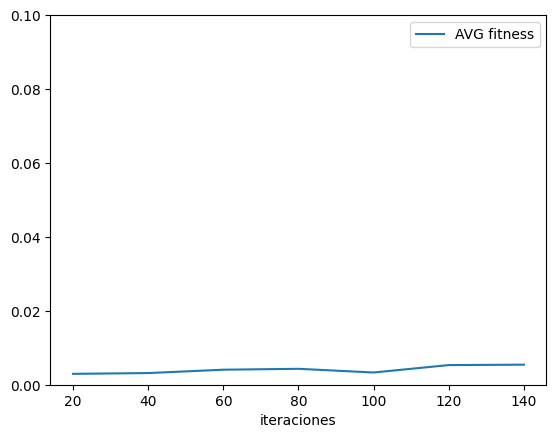

In [ ]:
datos = pd.DataFrame( {"iteraciones": list_iterations,
                       "AVG fitness": list_avg_fitness})

datos.set_index('iteraciones', inplace = True)
datos.head()

%matplotlib inline
datos.plot(kind = 'line', ylim=(0,0.10), use_index = True)
print(datos)

### Local Search

In [ ]:
# Función de vecindad
